# 다중 회귀 - 보스톤 주택 가격

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- 산점도와 선형회귀 직선: seaborn.regplot()

In [6]:
s = 'ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT'
features = s.split('\t')
features

['ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

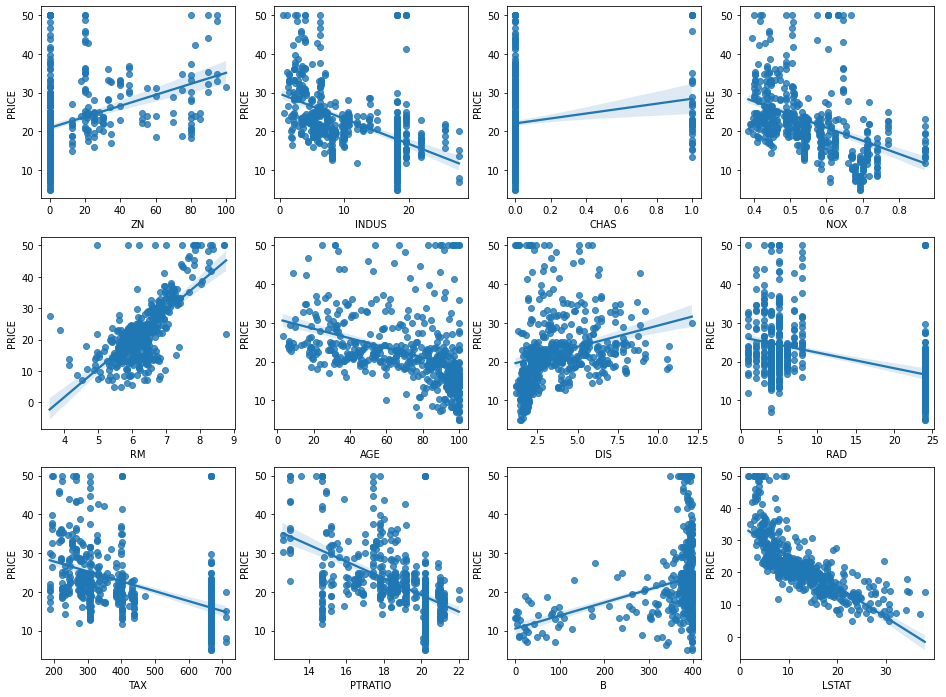

In [7]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(16,12))
for i, feature in enumerate(features):
    row, col = i//4, i%4
    sns.regplot(x=feature, y='PRICE', data=df, ax=axs[row][col])

- 어떤 feature가 가격과 상관관계가 높을까?

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [10]:
y = boston.target
for feature in boston.feature_names:
    X = df[feature].values.reshape(-1,1)
    lr = LinearRegression()
    lr.fit(X, y)
    r2 = lr.score(X, y)
    print(f'{feature}: {r2:.4f}')

CRIM: 0.1508
ZN: 0.1299
INDUS: 0.2340
CHAS: 0.0307
NOX: 0.1826
RM: 0.4835
AGE: 0.1421
DIS: 0.0625
RAD: 0.1456
TAX: 0.2195
PTRATIO: 0.2578
B: 0.1112
LSTAT: 0.5441


- 다중 선형회귀

In [11]:
X = boston.data
y = boston.target
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# Weight (기울기)
lr.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [14]:
# bias (절편)
lr.intercept_

36.459488385090125

- 5개의 데이터에 대한 예측값과 실제값

In [15]:
boston.data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [16]:
np.dot(lr.coef_, boston.data[0]) + lr.intercept_

30.003843377016743

In [17]:
for i in range(5):
    pred = np.dot(lr.coef_, boston.data[i]) + lr.intercept_
    print(f'예측값: {pred:.4f}, 실제값: {boston.target[i]}')

예측값: 30.0038, 실제값: 24.0
예측값: 25.0256, 실제값: 21.6
예측값: 30.5676, 실제값: 34.7
예측값: 28.6070, 실제값: 33.4
예측값: 27.9435, 실제값: 36.2


In [18]:
lr.predict(boston.data[:5])

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

In [22]:
lr.predict(boston.data[0].reshape(1,-1))

array([30.00384338])